In [1]:
import psycopg2 as pg
import yaml
from pathlib import Path
import os
import pandas as pd
import configparser
from matplotlib import pyplot as plt
import numpy as np
import os
from pathlib import Path
import calendar
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# First we setup the variable to be used in the code
#Set path
schema_path = Path(
        #os.environ['HOME'],
        "C:/Users/tolom/OneDrive/Desktop/"
        'Sysdata',
        'misc',
        'schemas.yaml'
    )
data_path = Path(
        "C:/Users/tolom/OneDrive/Desktop/",
        'Sysdata',
        'data'
    )

#Set db variables
host = 'localhost'
port = 5432
dbname = 'sysdata'
user = 'postgres'
password = 'mario'


# Set Query for table
query_2006 = "select" \
"  year," \
"  month," \
"  dayofmonth," \
"  dayofweek," \
"  tailnum," \
"  origin," \
"  dest," \
"  crsdeptime," \
"  crsarrtime," \
"  depdelay," \
"  arrdelay," \
"  carrierdelay," \
"  weatherdelay," \
"  nasdelay," \
"  securitydelay," \
"  lateaircraftdelay " \
"from year_2006" 
query_2007 = "select" \
"  year," \
"  month," \
"  dayofmonth," \
"  dayofweek," \
"  tailnum," \
"  origin," \
"  dest," \
"  crsdeptime," \
"  crsarrtime," \
"  depdelay," \
"  arrdelay," \
"  carrierdelay," \
"  weatherdelay," \
"  nasdelay," \
"  securitydelay," \
"  lateaircraftdelay " \
"from year_2007"
query_2008 = "select" \
"  year," \
"  month," \
"  dayofmonth," \
"  dayofweek," \
"  tailnum," \
"  origin," \
"  dest," \
"  crsdeptime," \
"  crsarrtime," \
"  depdelay," \
"  arrdelay," \
"  carrierdelay," \
"  weatherdelay," \
"  nasdelay," \
"  securitydelay," \
"  lateaircraftdelay " \
"from year_2008"

In [4]:
#defining function for connection to postgresql database
def connection_to_sql_database(host, port, dbname, user, password):
    connection = pg.connect(
        host=host,
        port=port,
        dbname=dbname,
        user=user,
        password="mario"
    )
    return connection

In [5]:
# defining function to query sql database and store data in dataframe
def query_to_dataframe(connection_sql, query):
    df = pd.read_sql_query(query, connection_sql)
    return df

In [6]:
# Run script. First connect to sql database
connection_sql = connection_to_sql_database(host, port, dbname, user, "mario")

In [7]:
# storing table in dataframes
df_2006 = query_to_dataframe(connection_sql, query_2006)
df_2007 = query_to_dataframe(connection_sql, query_2007)
df_2008 = query_to_dataframe(connection_sql, query_2008)

In [8]:
# adding date column to dataframe
df_2006["date"] = pd.to_datetime((df_2006['year']*10000+df_2006['month']*100+df_2006['dayofmonth']).astype('int'), format='%Y%m%d')
df_2007["date"] = pd.to_datetime((df_2007['year']*10000+df_2007['month']*100+df_2007['dayofmonth']).astype('int'), format='%Y%m%d')
df_2008["date"] = pd.to_datetime((df_2008['year']*10000+df_2008['month']*100+df_2008['dayofmonth']).astype('int'), format='%Y%m%d')

In [162]:
df_2006.head()

,year,month,dayofmonth,dayofweek,tailnum,origin,dest,crsdeptime,crsarrtime,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,date
0,2006,12,23,6,N471UA,LAS,LAX,1510,1622,170.0,172.0,16,0,2,0,154,2006-12-23
1,2006,12,24,7,N457UA,LAS,LAX,1443,1555,-3.0,6.0,0,0,0,0,0,2006-12-24
2,2006,12,25,1,N482UA,LAS,LAX,1443,1555,-10.0,-1.0,0,0,0,0,0,2006-12-25
3,2006,12,26,2,N465UA,LAS,LAX,1443,1555,61.0,60.0,0,0,1,0,59,2006-12-26
4,2006,12,27,3,N446UA,LAS,LAX,1443,1555,63.0,57.0,23,0,0,0,34,2006-12-27


In [9]:
# first we calcualte the average delay per flight for all the years. 
columns_deleays_in_min = ["year", "depdelay", "arrdelay", "carrierdelay", "weatherdelay", "nasdelay", "securitydelay", "lateaircraftdelay"]
df_group_by_year_2006 = df_2006.loc[:, columns_deleays_in_min].groupby("year").mean().round(2)
df_group_by_year_2006.head()

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
year,,,,,,,
2006,10.09,8.68,3.4,0.68,3.59,0.03,4.52


In [47]:
df_group_by_year_2007 = df_2007.loc[:, columns_deleays_in_min].groupby("year").mean().round(2)
df_group_by_year_2007.head()

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
year,,,,,,,
2007,11.4,10.19,3.87,0.77,3.78,0.02,5.1


In [97]:
df_group_by_year_2008 = df_2008.loc[:, columns_deleays_in_min].groupby("year").mean().round(2)
df_group_by_year_2008.head()

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
year,,,,,,,
2008,9.97,8.17,15.77,3.04,17.16,0.07,20.77


# Report Delay USA Airports

## Departure vs Arrival

First insight for the report. We compare the departure delays vs the arrival delays. 
We notice for all the year delay on departure are higher than delays on arrival.
2007 has been the year with higher delays.

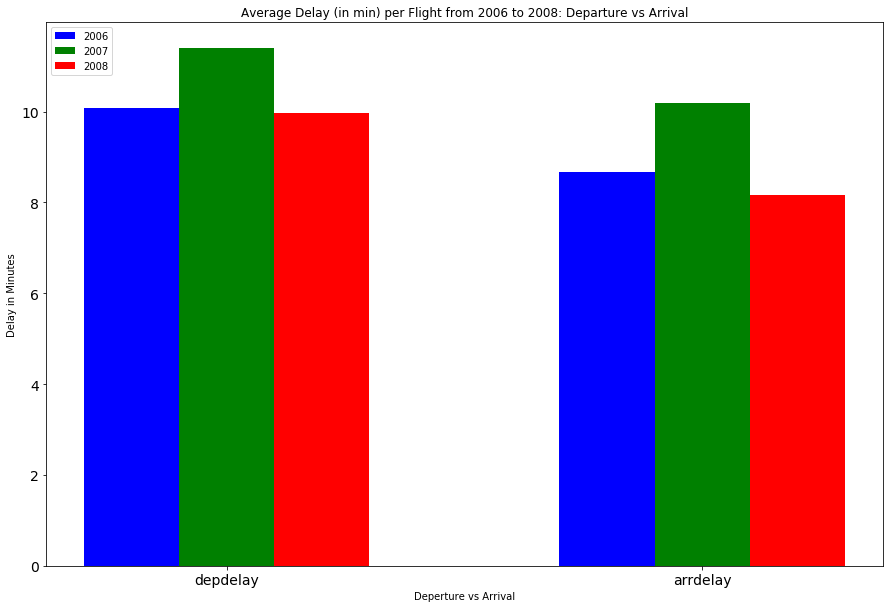

In [281]:
x = np.arange(1, len(columns_deleays_in_min[1:3]) + 1)
y = df_group_by_year_2006.loc[:, columns_deleays_in_min[1:3]].values.ravel()
z = df_group_by_year_2007.loc[:, columns_deleays_in_min[1:3]].values.ravel()
k = df_group_by_year_2008.loc[:, columns_deleays_in_min[1:3]].values.ravel()

x_labels = columns_deleays_in_min[1:3]
y_labels = [0, 2, 4, 6, 8, 10]
f, ax = plt.subplots(figsize=(15,10))
width = 0.2
ax.bar(x - width, y, width=width, color='b', align='center', label="2006")
ax.bar(x , z, width=width, color='g', align='center', label="2007")
ax.bar(x + width, k, width=width, color='r', align='center', label="2008")
ax.set_xticklabels(x_labels, fontsize=14)
ax.set_yticklabels(y_labels, fontsize=14)
ax.set_xticks(x)
ax.set_xlabel('Deperture vs Arrival')
ax.set_ylabel('Delay in Minutes')
ax.set_title('Average Delay (in min) per Flight from 2006 to 2008: Departure vs Arrival')
ax.legend()


plt.show()


## Reason for Delays

We now analyze the reason for the delays. We can't use the 2008 data because we miss a lot of
observations (i.e. we have NULL values), so the data are not comparable with the 2006 and 2007 year.
We get very interesting insight. The security check are overall efficient, since their impact
on delays is very low. On the other side, delays due to late air craft have the higher impact,
suggesting mitigation effect should be taken to reduce this type of delay. Finally, delays have increased from 2006 to 2007.

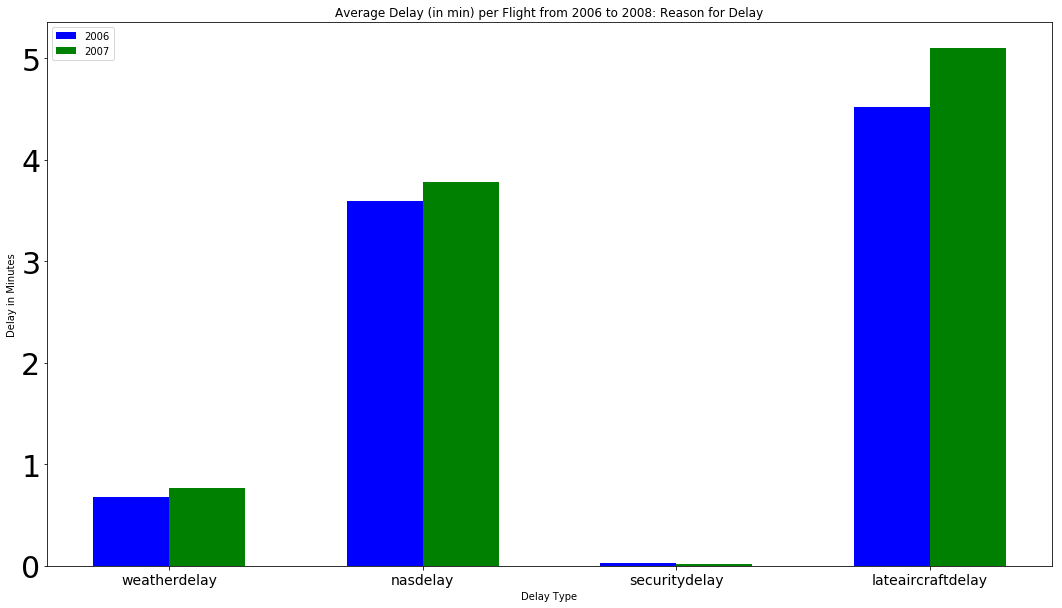

In [283]:
x = np.arange(1, len(columns_deleays_in_min[4:-1]) + 1)
y = df_group_by_year_2006.loc[:, columns_deleays_in_min[4:-1]].values.ravel()
z = df_group_by_year_2007.loc[:, columns_deleays_in_min[4:-1]].values.ravel()
#k = df_group_by_year_2008.loc[:, columns_deleays_in_min[4:]].values.ravel()

x_labels = columns_deleays_in_min[4:-1]
f, ax = plt.subplots(figsize=(18,10))
width = 0.3
ax.bar(x - width/2, y, width=width, color='b', align='center', label="2006")
ax.bar(x + width/2, z, width=width, color='g', align='center', label="2007")
#ax.bar(x + width, k, width=width, color='r', align='center', label="2008")
ax.set_xticklabels(x_labels, fontsize=14)
ax.set_xticks(x)
ax.set_xlabel('Delay Type')
ax.set_ylabel('Delay in Minutes')
ax.set_title('Average Delay (in min) per Flight from 2006 to 2008: Reason for Delay')
ax.legend()


plt.show()


## Delays per Airport
We now calculate the average delays per origin airport. We first want to identify the less efficient airport. We visualize the top 5 airport per delay for 2006, 2007 and 2008. 
We notice the airport ACK it was in the top less efficient airport for all the years. In addition, we see that most of the delays are caused by the NAS system, suggestingt this airport should improve his NAS system.
Among the most efficient airport, we notice WYS airport.

In [23]:
columns_deleays_in_min[0] = "origin"
df_group_by_origin_2006 = df_2006.loc[:, columns_deleays_in_min].groupby("origin").mean().round(2)
df_group_by_origin_2007 = df_2007.loc[:, columns_deleays_in_min].groupby("origin").mean().round(2)
df_group_by_origin_2008 = df_2008.loc[:, columns_deleays_in_min].groupby("origin").mean().round(2)

In [24]:
df_group_by_origin_2006.nlargest(5, "depdelay")

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
origin,,,,,,,
ADK,39.00,32.99,4.38,2.04,1.19,14.58,7.62
ACK,33.51,38.88,6.77,0.00,20.68,0.01,8.75
CKB,20.00,-5.00,0.00,0.00,0.00,0.00,0.00
FAY,19.15,19.38,6.39,2.10,9.73,0.07,2.86
CWA,18.40,15.51,1.36,1.32,13.62,0.00,4.98


In [25]:
df_group_by_origin_2007.nlargest(5, "depdelay")

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
origin,,,,,,,
ACK,51.35,46.12,1.05,0.34,27.05,0.11,18.04
PIR,45.50,35.75,10.50,0.00,2.00,0.00,24.00
SOP,35.86,40.46,24.97,6.03,6.67,0.00,1.27
MCN,23.84,24.09,18.70,2.36,2.95,0.00,0.78
HHH,23.83,20.65,15.02,3.76,3.36,0.08,1.70


In [26]:
df_group_by_origin_2008.nlargest(5, "depdelay")

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
origin,,,,,,,
ACK,29.85,28.60,19.23,7.57,32.99,0.00,24.43
PUB,27.00,74.00,0.00,27.00,47.00,0.00,0.00
CEC,24.19,24.67,11.12,2.02,41.23,0.00,23.94
PIR,22.80,23.80,99.00,0.00,19.00,0.00,0.00
SPI,22.31,21.95,19.90,0.74,49.00,0.24,24.33


In [27]:
df_group_by_origin_2006.nsmallest(5, "depdelay")

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
origin,,,,,,,
PIH,-5.25,-5.64,0.50,0.23,0.13,0.00,0.90
WYS,-4.25,-2.78,0.50,0.63,0.00,0.06,1.62
HVN,-3.67,-6.00,0.00,0.00,5.33,0.00,0.00
EKO,-3.48,-4.58,0.81,0.31,0.12,0.05,1.27
ITO,-2.54,-2.17,0.84,0.00,0.07,0.01,1.32


In [28]:
df_group_by_origin_2007.nsmallest(5, "depdelay")

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
origin,,,,,,,
GLH,-5.50,4.00,0.00,0.00,0.00,0.00,0.00
WYS,-5.00,-0.73,2.16,0.17,0.00,0.00,0.42
PIH,-3.51,-3.52,1.16,0.69,0.12,0.00,1.37
ITO,-3.04,-0.93,0.76,0.05,0.05,0.00,1.40
TWF,-1.84,-2.98,1.21,1.64,0.28,0.01,1.31


In [29]:
df_group_by_origin_2008.nsmallest(5, "depdelay")

,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
origin,,,,,,,
WYS,-6.16,-11.17,0.00,0.00,1.00,0.00,51.67
BLI,-5.53,-12.04,13.50,34.75,6.25,0.00,0.00
INL,-4.80,-6.06,15.00,0.00,0.00,0.00,0.00
PIH,-4.15,-6.56,9.38,7.31,6.08,0.04,31.91
COD,-3.97,-7.76,11.80,8.71,15.76,0.77,27.49


## Seasonality of Delays
We now want to check the seasonality of delais. So we calculate the average delay for month from 2006 to 2008. We notice that the dealys pick during the holiday time, summer and end of year. Summer 2007 experience the longest delays.

In [31]:
columns_deleays_in_min[0] = "month"
columns_deleays_in_min.append("year")
df_group_by_origin_2006 = df_2006.loc[:, columns_deleays_in_min].groupby("month").mean().round(2)
df_group_by_origin_2006["num_flight"] = df_2006.loc[:, ["month", "year"]].groupby("month").count()
df_group_by_origin_2007 = df_2007.loc[:, columns_deleays_in_min].groupby("month").mean().round(2)
df_group_by_origin_2007["num_flight"] = df_2007.loc[:, ["month", "year"]].groupby("month").count()
df_group_by_origin_2008 = df_2008.loc[:, columns_deleays_in_min].groupby("month").mean().round(2)
df_group_by_origin_2008["num_flight"] = df_2008.loc[:, ["month", "year"]].groupby("month").count()
df_group_by_origin = pd.concat([df_group_by_origin_2006, df_group_by_origin_2007, df_group_by_origin_2008])
df_group_by_origin = df_group_by_origin.reset_index()
df_group_by_origin.head()

,month,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,year,num_flight
0,1,8.08,5.63,2.95,0.60,3.11,0.01,3.39,2006.0,581287
1,2,9.14,7.36,3.12,0.63,3.40,0.04,3.98,2006.0,531247
2,3,9.76,7.93,3.13,0.55,3.45,0.03,4.39,2006.0,605217
3,4,8.19,6.42,2.88,0.47,2.97,0.04,3.84,2006.0,585351
4,5,8.54,6.89,2.86,0.53,3.20,0.01,3.99,2006.0,602919


In [237]:
# we will consider the average delay between departure and arrival
df_group_by_origin["avg_dep_arr_delay"] = (df_group_by_origin["depdelay"] + df_group_by_origin["arrdelay"])/2

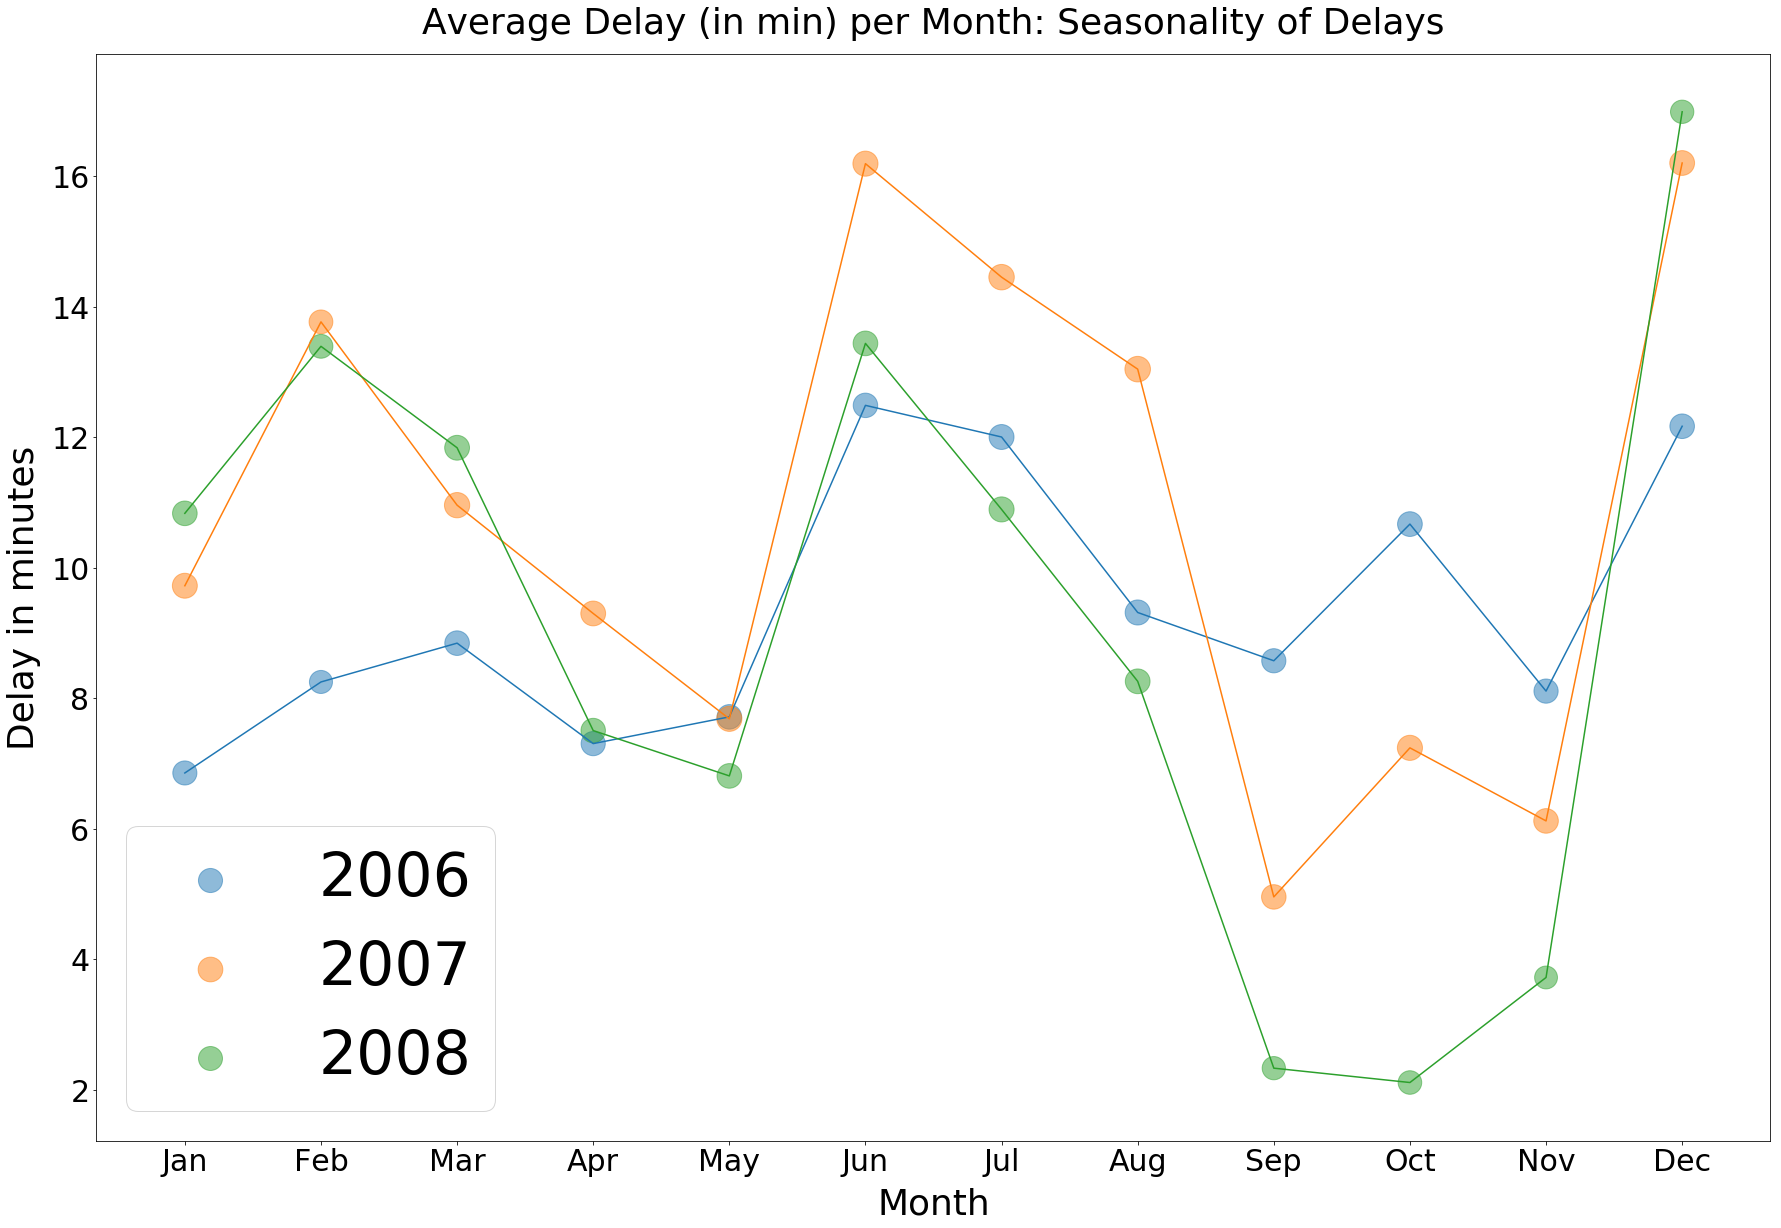

In [261]:
# We plot the evolution of the delays accros the year. 
# We see the month on the x axis and the average delay on y axis.
# The size of the bubble are the number of flights

x = df_group_by_origin_2006.index.to_list()
x = [calendar.month_abbr[month] for month in x] 
y = df_group_by_origin["avg_dep_arr_delay"].values.ravel()
z =  df_group_by_origin["num_flight"].values.ravel()

plt.figure(figsize=(30,20))
plt.scatter(x, 
            df_group_by_origin[df_group_by_origin['year'] == 2006]
            ["avg_dep_arr_delay"].values.ravel(), 
            s= df_group_by_origin[df_group_by_origin['year'] == 2006]
            ["num_flight"].values.ravel()/1000, alpha=0.5, label="2006")
plt.plot(x, 
            df_group_by_origin[df_group_by_origin['year'] == 2006]
            ["avg_dep_arr_delay"].values.ravel())
plt.scatter(x, 
            df_group_by_origin[df_group_by_origin['year'] == 2007]
            ["avg_dep_arr_delay"].values.ravel(), 
            s=df_group_by_origin[df_group_by_origin['year'] == 2007]
            ["num_flight"].values.ravel()/1000, alpha=0.5, label="2007")
plt.plot(x, 
            df_group_by_origin[df_group_by_origin['year'] == 2007]
            ["avg_dep_arr_delay"].values.ravel())
plt.scatter(x, 
            df_group_by_origin[df_group_by_origin['year'] == 2008]
            ["avg_dep_arr_delay"].values.ravel(), 
            s=df_group_by_origin[df_group_by_origin['year'] == 2008]
            ["num_flight"].values.ravel()/1000, alpha=0.5, label="2008")
plt.plot(x, 
            df_group_by_origin[df_group_by_origin['year'] == 2008]
            ["avg_dep_arr_delay"].values.ravel())
plt.title("Average Delay (in min) per Month: Seasonality of Delays", fontsize=36, pad=20)
plt.xlabel("Month", fontsize=36, labelpad=10)
plt.ylabel("Delay in minutes", fontsize=36, labelpad=10)
plt.rc('xtick',labelsize=30)
plt.rc('ytick',labelsize=30)
plt.legend(loc=3, prop={'size': 60})


plt.show()

In [10]:
columns_deleays_in_min[0] = "date"
df_group_by_day_2006 = df_2006.loc[:, columns_deleays_in_min].groupby("date").mean().round(2)
df_group_by_day_2007 = df_2007.loc[:, columns_deleays_in_min].groupby("date").mean().round(2)
df_group_by_day_2008 = df_2008.loc[:, columns_deleays_in_min].groupby("date").mean().round(2)
df_group_by_day = pd.concat([df_group_by_day_2006, df_group_by_day_2007, df_group_by_day_2008])
df_group_by_day = df_group_by_day.reset_index()
df_group_by_day.head()

,date,depdelay,arrdelay,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2006-01-01,12.69,10.21,5.07,0.68,3.00,0.03,4.32
1,2006-01-02,37.50,39.93,7.55,3.31,11.78,0.03,16.22
2,2006-01-03,26.85,26.56,6.92,1.96,7.60,0.02,10.03
3,2006-01-04,9.61,6.14,4.01,0.27,1.59,0.01,3.08
4,2006-01-05,6.02,3.49,2.61,0.19,1.95,0.01,2.56


# Final Overview Daily Delay
We finally provide an overview of the daily delay over time from 2006 to 2008. We see most of the delays happen on the 2-3 days before Christmas. This suggest that if you decide to come back home for Christmas holiday, you should ask a couple of more day off to your boss!

In [21]:
fig = px.line(df_group_by_day, x="date", y="depdelay", title='Daily Average Delay per Flight from 2006 to 2008')
fig.update_layout(
    autosize=False,
    width=2000,
    height=500)
fig.show()